In [2]:
import numpy as np
import matplotlib.pyplot as plt
import utils

%matplotlib widget

In [3]:
def simulate(problem_func, n_students=365, n_simulations=1000):
    # Initialize the counter of matches at 0
    matches = 0

    # Run the simulation for the desired number of times
    for _ in range(n_simulations):
        # If there is a match in the classroom add 1 to the counter of matches
        if problem_func(n_students):
            matches += 1

    # Return the ratio of number of matches / number of simulations
    return matches / n_simulations

In [4]:
def problem_1(n_students):
    # Predefine a specific birthday
    predef_bday = np.random.randint(0, 365)

    # Generate birthdays for every student
    gen_bdays = np.random.randint(0, 365, (n_students))

    # Check if predefined bday is among students
    return predef_bday in gen_bdays

In [5]:
n = 100  # try changing this value!
simulated_prob = simulate(problem_1, n_students=n, n_simulations=10_000)

print(
    f"The simulated probability of any student to have a bday equal to a predefined value is {simulated_prob} in a classroom with {n} students"
)

The simulated probability of any student to have a bday equal to a predefined value is 0.2444 in a classroom with 100 students


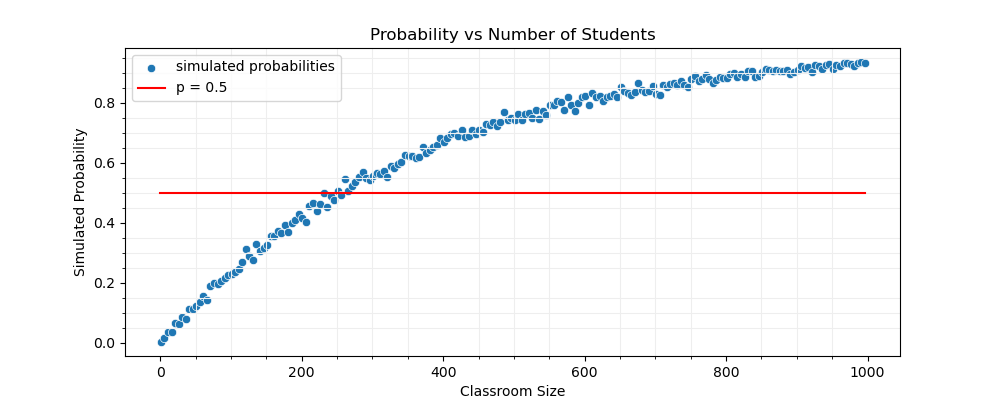

In [6]:
# Generate the simulated probability for every classroom
simulated_probs_1 = [
    simulate(problem_1, n_students=n) for n in utils.big_classroom_sizes
]

# Create a scatterplot of simulated probabilities vs classroom size
utils.plot_simulated_probs(simulated_probs_1, utils.big_classroom_sizes)

In [7]:
def problem_2(n_students):
    # Generate birthdays for every student
    gen_bdays = np.random.randint(0, 365, (n_students))

    # Pick one student at random
    rnd_index = np.random.randint(0, len(gen_bdays))

    # Get the bday from the selected student
    rnd_bday = gen_bdays[rnd_index]

    # Take the bday out of the pool of bdays (otherwise there is always a match)
    remaining_bdays = np.delete(gen_bdays, rnd_index, axis=0)

    # Check if another student shares the same bday
    return rnd_bday in remaining_bdays

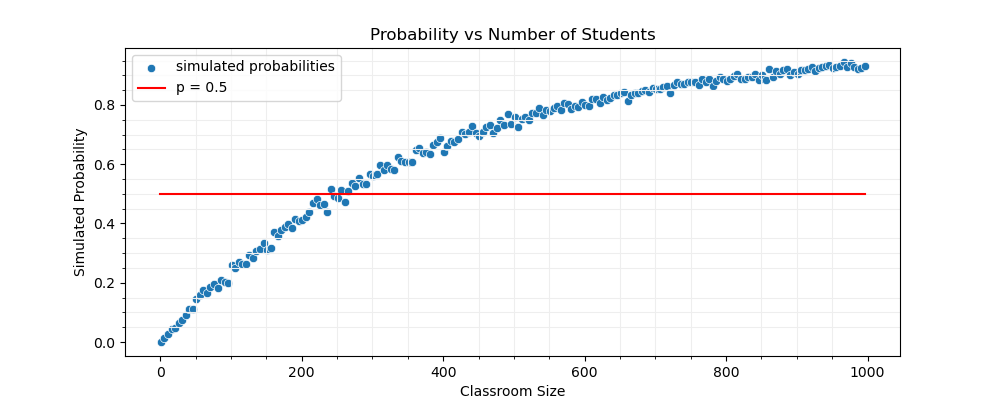

In [8]:
# Generate the simulated probability for every classroom
simulated_probs_2 = [
    simulate(problem_2, n_students=n) for n in utils.big_classroom_sizes
]

# Create a scatterplot of simulated probabilities vs classroom size
utils.plot_simulated_probs(simulated_probs_2, utils.big_classroom_sizes)

In [9]:
def problem_3(n_students):
    # Generate birthdays for every student
    gen_bdays = np.random.randint(0, 365, (n_students))

    # Get array containing unique bdays
    unique_bdays = np.array(list(set(gen_bdays)))

    # Check that both the original and unique arrays have the same length
    # (if so then no two students share the same bday)
    return len(unique_bdays) != len(gen_bdays)

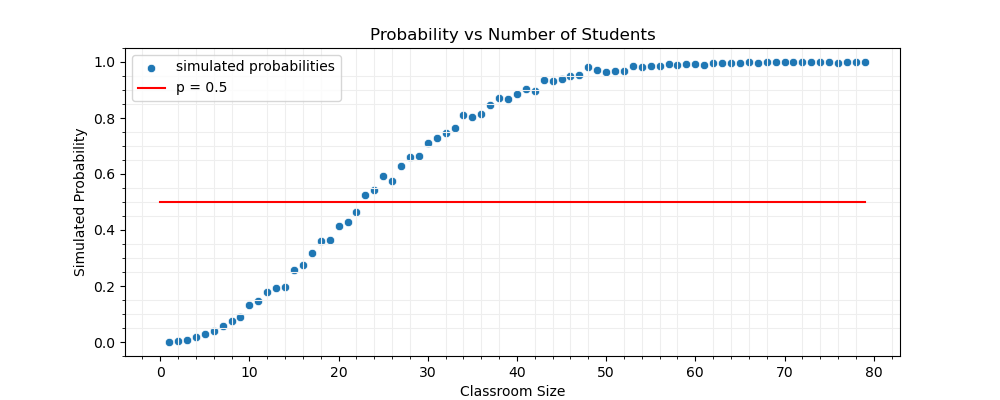

In [10]:
# Generate the simulated probability for every classroom
simulated_probs_3 = [
    simulate(problem_3, n_students=n) for n in utils.small_classroom_sizes
]

# Create a scatterplot of simulated probabilities vs classroom size
utils.plot_simulated_probs(simulated_probs_3, utils.small_classroom_sizes)

In [11]:
def problem_4(n_students):
    # Generate birthdays for every student in classroom 1
    gen_bdays_1 = np.random.randint(0, 365, (n_students))

    # Generate birthdays for every student in classroom 2
    gen_bdays_2 = np.random.randint(0, 365, (n_students))

    # Check for any match between both classrooms
    return np.isin(gen_bdays_1, gen_bdays_2).any()

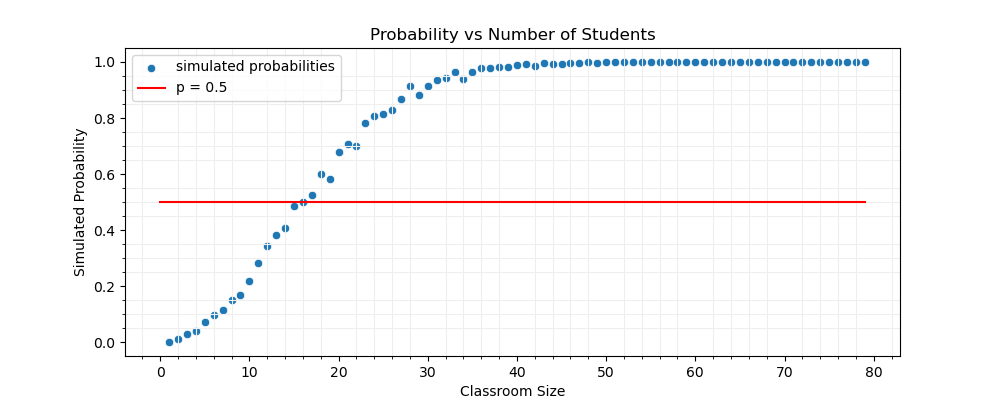

In [12]:
# Generate the simulated probability for every classroom
simulated_probs_4 = [
    simulate(problem_4, n_students=n) for n in utils.small_classroom_sizes
]

# Create a scatterplot of simulated probabilities vs classroom size
utils.plot_simulated_probs(simulated_probs_4, utils.small_classroom_sizes)